In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp
%matplotlib inline

In [ ]:
def drawslopefield(f,ts=0,te=10,xs=0,xe=10,n=11):
    #draw a slope field for dx/dt = f(t,x)
    #use box [ts,te] x [xs,xe]
    #use n points in each direction
    
    xs = np.linspace(xs,xe,n)
    ts = np.linspace(ts,te,n)
    
    T,X = np.meshgrid(ts,xs)
    
    #derivatives
    dt = 1.
    dx = f(T,X)
    
    plt.quiver(T,X,dt,dx,color='purple');
    

#def func(t,x):
#    return(x*(3-x))
#
#drawslopefield(func,0,5,0,4,15)


### Lake Eutrophication
If you visit a lot of lakes of different sizes in different parts of the world, you will see that there are two common physical states. Some lakes are relatively clean and fresh-smelling— these are called oligotrophic. In contrast, eutrophic lakes are overgrown with algae and have a rank smell. Eutrophic lakes have a phosphorus content that is many times higher than that of oligotrophic lakes. Biologists have long known that there does not appear to be a gradation of intermediate states; indeed, rapid eutrophication of formerly oligotrophic lakes is an environmental problem that can be caused by runoff of fertilizer from farms. Why there are no intermediate states, how eutrophication occurs, and the possibility of restoring a eutrophic lake are all questions that can be explored with a simple mathematical model due to a 1999 paper by Carpenter et al.
$$\frac{dp}{dt} = b - p + r\frac{p^q}{1 + p^q}$$
This nondimensionalized model incorporates three mechanisms for change in phosphorus content in a lake on the LHS of the DE. The first term, $b$, represents the influx of phosphorus from the environment; this can include artificial sources such as farm runoff as well as natural sources such as decomposition of plants. The standard use of phosphates in laundry and dishwashing detergents was linked to lake eutrophication in the late 1960s and spawned one of the early conflicts between the environmental movement and industry. Phosphates are still used in some detergents, but smaller amounts and better treatment of wastewater have significantly reduced their contribution to eutrophication. The second term represents the combined processes of sedimentation, outflow, and absorption by plants, all of which remove phosphorus from the water. The last term represents the recycling of phosphorus from sediments. This term plays a significant role in the physical system, because the large values typical of $q$ (from 2 for a cold deep lake to as much as 20 for a warm shallow lake) mean that the recycling rate is roughly $r$ when $p>1$ and very small when $p<1$. Thus, eutrophic lakes, which are high in phosphorus, have large recycling rates that keep the phosphorus concentration high; oligotrophic lakes, in contrast, have very little recycling of sedimentary phosphorus.

- Let $b=0.25$, $q=8, r=5$.  
 - Graph $\frac{dp}{dt}$ vs $p$.
 - Using some numerical tool, calculate any equilibrium solutions. You can use the fsolve command from the scipy library.
 - What if $b=1$? What changes above? What does $b$ do to the graph?
- Use the routine above to create slope fields for the cases above. What are equilibrium solutions associated with in the graphs? Which equilibrium solutions do you think are stable and unstable?
- Interpret each of the two pictures in the context of the problem described above. Write a short paragraph in your notes includes rough sketches of your figures that describes how the value of $b$ affects the dynamics of this system.
- Use the solve_ivp command to generate some numerical solution curves. (Numerical solutions to IVPs are covered in more detail in MSCS 446. We'll just be using those ideas now - not developing any algorithms.)
- If you are interested in this problem UW Stout has a LAKES REU related to this problem. These equations come from this paper studying Lake Mendota in Madison.

In [ ]:
b = .3
r = 5.
q = 8
def dpdt(t,p):
    return(b - p + r*p**q/(1+p**q))

ps = np.linspace(0,7,101)
dpdts = dpdt(1,ps)

plt.plot(ps,dpdts,'b');
plt.xlabel('p');
plt.ylabel('dp/dt');

#drawslopefield(dpdt)

In [ ]:
b = 1.
r = 5.
q = 8
def dpdt1(p):
    return(b - p + r*p**q/(1+p**q))

root = fsolve(dpdt1,6)
print(root)

In [ ]:
#use solve_ivp to generate a solution

b = .25
r = 5.
q = 8
def dpdt(t,p):
    return(b - p + r*p**q/(1+p**q))


sol = solve_ivp(dpdt,[0, 5],[.77],dense_output=True)

plt.plot(sol.t,sol.y[0])

### Housing market
Consider the housing market. The market at time $t$ consists of buyers $B(t)$ and sellers $S(t)$.
  Let $b = B - B_0$ and $s = S - S_0$ where $B_0,S_0$ represent a normal (or equilibrium) amount of buyers.
  We can model the dynamics of the housing market with the system below.
  $$b' = \alpha b + \beta s$$
  $$s' = \gamma b + \delta s$$
  <ol type='1'>
    <li> What does $b>0, s=0$ mean? Use common language.
    <li> What does $s < 0$ mean? Use common language.
    <li> What are the signs of $\alpha, \beta, \gamma, \delta$? Why? Use common language.
    <li> Assume $\beta = \gamma = 1, \alpha = \delta = 0$. Find the eigenvalues, eigenvectors, and general solution of the system.
    <li> Sketch a phase plane with some solution curves.
    <li> $b=s=0$ is an equilibrium solution. Why? Use your answers above to describe the behaviors of solutions near (0,0). What is the name of this type of equilibrium?
    <li> Now assume $\beta = 3, \gamma = 2, \alpha = -8,  \delta = -13$.
      A solution is given by $c_1 e^{-14t}\begin{bmatrix}1\\-2\end{bmatrix} + c_2  e^{-7t}\begin{bmatrix}3\\1 \end{bmatrix}$.
      (0,0) is still an equilibrium. What is the name of this type of equilibrium solution?


### Technique tangent

1. Solve the system
\begin{align*} x' &= 4x - 2y \\ y' &= 2x - y\end{align*}
2. Solve the system
\begin{align*} x' &= x - 2y \\ y' &= 2x + y\end{align*}


### Eigenvalues, eigenvectors and the phase plane
For each system below. Find the eigenvalues and eigenvectors of the system. Write down a general solution and make a phase plane portrait using pplane or similar software.

1. \begin{align*} x' &= 0x + 1y\\y'&= 1x + 0 y\end{align*}&nbsp;

2. \begin{align*} x' &= -8x + 3y\\y'&= 2x -13 y\end{align*}&nbsp;

3. \begin{align*} x' &= 2x - y\\y'&= -1x + 2y\end{align*}&nbsp;

4. \begin{align*} x' &= 0x - 1y\\y'&= 1x + 0 y\end{align*}&nbsp;

5. \begin{align*} x' &= 4x - 3y\\y'&= 3x +  4y\end{align*}&nbsp;


### Rabbits and sheep
Consider a population of rabbits, $x$, and sheep, $y$, that have dynamics shown below.
\begin{align*}x' &= x(3-x) - 2xy \\ y' &= y(2-y) - xy\end{align*}

- Describe each term in the equations above using common language.
- Find any equilibrium solutions.
- Use the solve_ivp command to find a handful of numerical solutions and plot them on one figure. Add your equilibrium solutions to this figure. 

In [ ]:
def func(t,v):
    #takes in t - independent var
    #v - vector of dependent var
    x,y = v[0],v[1]
    dxdt = x*(3-x)-2.*x*y
    dydt = y*(2-y)-x*y
    return(np.array([dxdt,dydt]))

sol = solve_ivp(func,[0,10],[2,2])

print(sol)


In [ ]:
plt.plot(sol.t,sol.y[0],'b',sol.t,sol.y[1],'r');
plt.xlabel('time');
plt.legend(['x','y']);

In [ ]:
plt.plot(sol.y[0],sol.y[1],'k');


### Hare and Lynx
Consider a population of hare $H$ and lynx $L$. In the absence of lynx, the hare population grows to a carrying capacity. In the absence of hares, the lynx population decays at a rate proportional to its size. 

Build and analyze a 2D system of differential equations that models this situation.

<div>
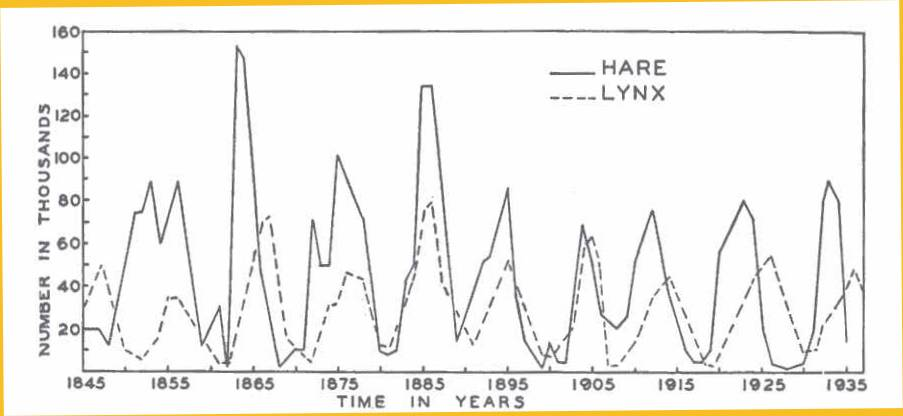
</div>